In [1]:
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
%run jswlab-projects/05.RicinLibraryAnalysis/analyzeCrispricin.py
%run jswlab-projects/10.Doubles_processing/GImap_analysis.py

In [154]:
doublesTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_doublestable.txt',sep='\t', index_col=0)
summedCountsTable = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181019_CRISPRa_summed_counts.txt',sep='\t', index_col=0, header=range(3))

filenameRoot = 'Doubles_Libraries/CRISPRa_final_analysis/filter_15/CRISPRa_K562_'

log2es_rep1 = pd.read_csv(filenameRoot + 'replicate1_allphenotypes.txt',sep='\t', index_col=0, header=None).iloc[:,0]
log2es_rep2 = pd.read_csv(filenameRoot + 'replicate2_allphenotypes.txt',sep='\t', index_col=0, header=None).iloc[:,0]

phenotypeMatrix = pd.read_csv(filenameRoot + 'replicateAverage_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_abba = pd.read_csv(filenameRoot + 'replicateAverage_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes = pd.read_csv(filenameRoot + 'replicateAverage_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_abba = pd.read_csv(filenameRoot + 'replicateAverage_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)
singlesTable = pd.read_csv(filenameRoot + 'sgRNA_to_gene.txt',sep='\t', index_col=0)

phenotypeMatrix_rep1 = pd.read_csv(filenameRoot + 'replicate1_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_rep1_abba = pd.read_csv(filenameRoot + 'replicate1_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes_rep1 = pd.read_csv(filenameRoot + 'replicate1_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_rep1_abba = pd.read_csv(filenameRoot + 'replicate1_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)

phenotypeMatrix_rep2 = pd.read_csv(filenameRoot + 'replicate2_phenotypeMatrix.txt',sep='\t', index_col=0)
phenotypeMatrix_rep2_abba = pd.read_csv(filenameRoot + 'replicate2_phenotypeMatrix_abbaAveraged.txt',sep='\t', index_col=0)
singlePhenotypes_rep2 = pd.read_csv(filenameRoot + 'replicate2_singlePhenotypes.txt',sep='\t', index_col=0)
singlePhenotypes_rep2_abba = pd.read_csv(filenameRoot + 'replicate2_singlePhenotypes_abbaAveraged.txt',sep='\t', index_col=0)

emap_sgRNA = pd.read_csv(filenameRoot + 'emap_sgRNA_nonegs.txt',sep='\t', index_col=0)
emap_sgRNA_wnegs = pd.read_csv(filenameRoot + 'emap_sgRNA_wnegs.txt',sep='\t', index_col=0)

emap_gene = pd.read_csv(filenameRoot + 'emap_gene.txt',sep='\t', index_col=0)
emap_gene.iloc[:5,:5]

AHR    ARID1A    ARRDC3      ATL1      BAK1
AHR     3.251447 -1.764937  0.750670 -0.237766 -0.470196
ARID1A -1.764937  5.858141  0.566831 -1.053317 -1.203479
ARRDC3  0.750670  0.566831  0.702131  0.878148  2.813867
ATL1   -0.237766 -1.053317  0.878148  5.204498  1.067236
BAK1   -0.470196 -1.203479  2.813867  1.067236  2.125301

In [3]:
#have to use dropna=FALSE on stack, otherwise will secretly drop nans and upper triangle will not behave as expected!!
def upperTriangle(matrix, k=1):
    keep = np.triu(np.ones(matrix.shape), k=k).astype('bool').reshape(matrix.size)
    return matrix.stack(dropna=False).loc[keep]

In [4]:
emap_gene_col = upperTriangle(emap_gene)

In [7]:
emap_gene_random = pd.DataFrame(np.random.random((len(emap_gene), len(emap_gene))), index=emap_gene.index, columns=emap_gene.columns)

for i in range(len(emap_gene)):
    for j in range(len(emap_gene)):
        
        if i >= j:
            rand_val = emap_gene_col.iloc[int(np.floor(emap_gene_random.iloc[i,j]*len(emap_gene)))]
            emap_gene_random.iloc[i,j] = rand_val
            emap_gene_random.iloc[j,i] = rand_val
            
emap_gene_random.iloc[:5,:5]

AHR    ARID1A    ARRDC3      ATL1      BAK1
AHR     0.560174  0.190863  0.470887  1.487930  0.850614
ARID1A  0.190863  0.025165  0.388842 -0.167572 -1.999211
ARRDC3  0.470887  0.388842  0.529938 -1.999211 -0.167572
ATL1    1.487930 -0.167572 -1.999211 -0.592538 -0.270873
BAK1    0.850614 -1.999211 -0.167572 -0.270873  0.750670

In [8]:
emap_gene_col.describe()

count    6216.000000
mean        0.050820
std         2.184771
min       -17.987431
25%        -1.005727
50%         0.101260
75%         1.247681
max        11.558372
dtype: float64

In [9]:
upperTriangle(emap_gene_random).describe()

count    6216.000000
mean       -0.093738
std         1.810104
min        -5.027743
25%        -1.040136
50%        -0.067961
75%         0.742918
max         8.108849
dtype: float64

In [10]:
%run jswlab-projects/10.Doubles_processing/hierarchical_annotation.py

In [11]:
genes_to_all_david = pd.read_csv('Doubles_Libraries/CRISPRa_final_analysis/20181217_david.txt', sep='\t',index_col=0).fillna('')

In [12]:
#convert continuous values to 0-1 scale
#assumes max>=center>=min but center does not have to be midpoint of min and max
def scale_to_fraction(values, min_value, center_value, max_value):
    if np.isclose((max_value - min_value) / 2.0 + min_value, 0):
        return np.maximum(0, np.minimum(1, (values-min_value)/(max_value - min_value)))
    
    else: #if color scale is not symmetrical, like -0.2->0->1.0
        if abs(max_value - center_value) > abs(center_value - min_value):
            symmetrical_min_value = center_value - abs(max_value-center_value)
            scaled_min_value = (min_value-symmetrical_min_value)/(max_value - symmetrical_min_value)
            
            return np.maximum(scaled_min_value, np.minimum(1, (values-symmetrical_min_value)/(max_value - symmetrical_min_value)))

        
        else:
            symmetrical_max_value = center_value + abs(min_value-center_value)
            scaled_max_value = (max_value-min_value)/(symmetrical_max_value - min_value)
            
            return np.maximum(0, np.minimum(scaled_max_value, (values-min_value)/(symmetrical_max_value - min_value)))


In [13]:
#'#20B6E2' -> '#F4EA18'
# 32,182,226 -> 244,234,24
# .125, .713, .886 -> .957, .918, .094
cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
blue_yellow = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)
blue_yellow.set_bad((.9, .9, .9, 1.0))
plt.register_cmap(cmap=blue_yellow)

In [14]:
red_blue = matplotlib.cm.RdBu_r
red_blue.set_bad((.9, .9, .9, 1.0))

In [15]:
#af8dc3 -> #f7f7f7 -> #7fbf7b
# 175,141,195 -> 247,247,247 -> 127,191,123
# 0.68627451, 0.55294118, 0.76470588 -> 0.96862745, 0.96862745, 0.96862745 -> 0.49803922, 0.74901961, 0.48235294
cdict = {'red':((0.0,0.68627451,0.68627451),
                (0.5,0.96862745,0.96862745),
                (1.0,0.49803922,0.49803922)),
        'green':((0.0,0.55294118,0.55294118),
                (0.5,0.96862745,0.96862745),
                (1.0,0.74901961,0.74901961)),
        'blue': ((0.0,0.76470588,0.76470588),
                (0.5,0.96862745,0.96862745),
                (1.0,0.48235294,0.48235294))}
green_purple = matplotlib.colors.LinearSegmentedColormap('GreenPurple',cdict)
green_purple.set_bad((.9, .9, .9, 1.0))
plt.register_cmap(cmap=green_purple)

In [16]:
brown_green = matplotlib.cm.BrBG
brown_green.set_bad((.9, .9, .9, 1.0))

In [18]:
emap_perturb_combined = emap_gene_random

dend_combined = hierarchy.linkage(emap_perturb_combined, method='average', metric='correlation', optimal_ordering=True)

leaf_order = get_clustered_leaf_order(emap_perturb_combined, dend_combined)

david_matrix, node_enrichment_table, eligible_parent_nodes, node_to_parent_dict, node_to_parent_table = \
    annotate_hierarchy(emap_perturb_combined, dend_combined, genes_to_all_david, -7.5)

In [20]:
eligible_parent_nodes['short name'] = [np.nan]*len(eligible_parent_nodes)

/home/mhorlbeck/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mhorlbeck/.local/lib/python2.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Doubles_Libraries/figs_crispra/png/649fig_emap.png


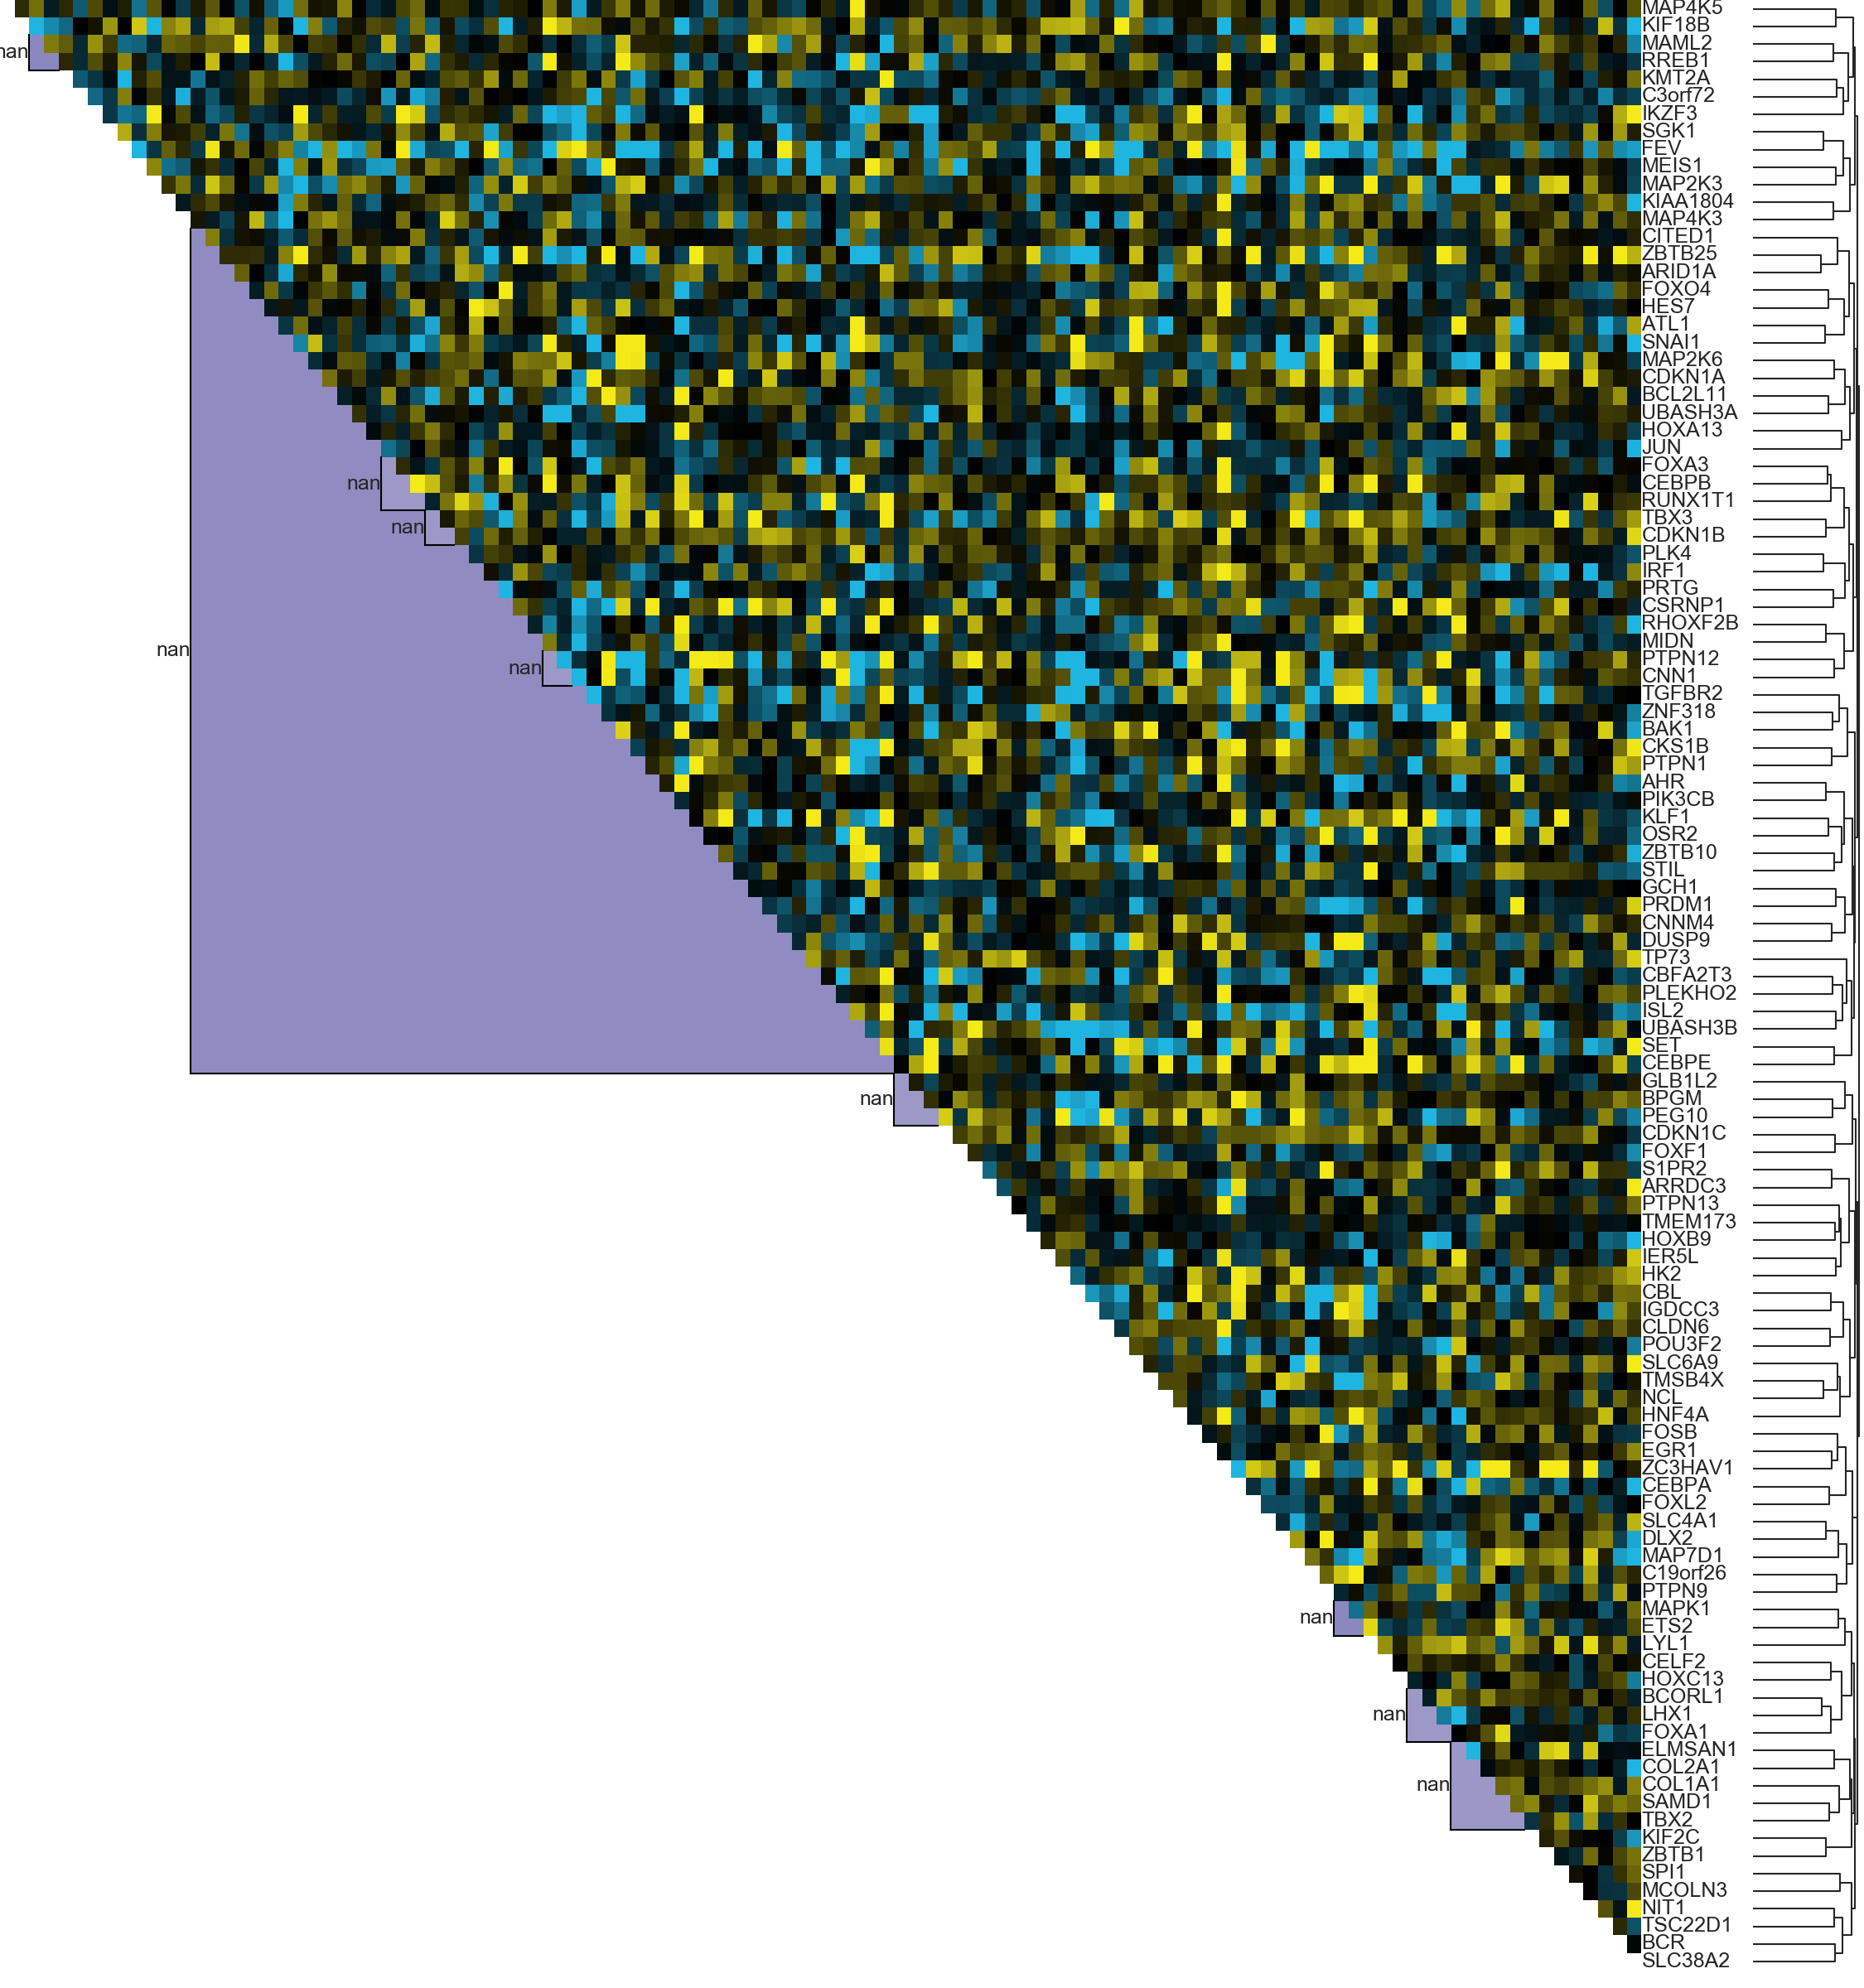

In [21]:
#replotting with gene names for supplement
fig, axis = plt.subplots(figsize=(7.5,8))
nrows, ncols = 1, 3
gs = plt.GridSpec(nrows,ncols, width_ratios=(5.9,0.4,0.4), wspace=0.0, hspace=0.0, figure=fig,
                         left=0,right=1,top=1,bottom=0)#, height_ratios=(2.5)


axes = np.ndarray((nrows,ncols), dtype='object')
for i in range(nrows):
    for j in range(ncols):
        axes[i,j] = plt.subplot(gs[i,j])

        axis = axes[i,j]
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.yaxis.set_tick_params(left='off', right='off', labelsize='8')
        axis.xaxis.set_tick_params(bottom='off', top='off', labelsize='8')

        axis.set_xticks([])
        axis.set_yticks([])
        


##dendrogram
axis = axes[0,2]

with plt.rc_context({'lines.linewidth': 0.5}):
    dend = sp.cluster.hierarchy.dendrogram(dend_combined,
            no_plot=False, color_threshold=0, above_threshold_color=almost_black, no_labels=True,
                                       orientation='right', ax=axis)


axis.set_ylim(((len(leaf_order)+1)*10), (0)*10)

##annotations
enrichment_matrix = np.zeros((len(leaf_order), len(leaf_order), 4))
for depth, col in node_to_parent_table.iteritems():
    for topnode, group in col.groupby(col):
        minindex = int(min(leaf_order.loc[group.index, 'clustered_order'].dropna())) #- 0.5
        maxindex = int(max(leaf_order.loc[group.index, 'clustered_order'].dropna())) #+ 0.5
        
        axes[0,0].plot((minindex - 0.5, minindex - 0.5), (minindex - 0.5, maxindex + 0.5), 'k-', lw=.5)
        axes[0,0].plot((minindex - 0.5, maxindex + 0.5), (maxindex + 0.5, maxindex + 0.5), 'k-', lw=.5)
        
        axes[0,0].text(minindex - 0.5, (maxindex - minindex) / 2.0 + minindex, eligible_parent_nodes.loc[int(topnode), 'short name'],
                 horizontalalignment='right', verticalalignment='center', fontsize=6)
        
        enrichment_matrix[minindex:maxindex+1, minindex:maxindex+1] \
            = matplotlib.cm.Purples_r(scale_to_fraction(np.array([eligible_parent_nodes.loc[int(topnode), 'logp']]), np.log(10**-6.6),np.log(10**-3.3),0))
            

##maps
axis = axes[0,0]

emap_gene_ordered = emap_gene.loc[leaf_order.index, leaf_order.index]
axis.imshow(blue_yellow(scale_to_fraction(np.ma.masked_array(
                emap_gene_ordered.values, 
                mask=emap_gene_ordered.isnull()), -4.0, 0.0, 4.0)) 
            * np.triu(np.ones(emap_gene_ordered.shape), 1).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1))
           + enrichment_matrix * np.tril(np.ones(emap_gene_ordered.shape), 0).reshape((emap_gene_ordered.shape[0], emap_gene_ordered.shape[1], 1)), interpolation='nearest')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))
axis.set_aspect('auto')

##gene names
axis = axes[0,1]

for i, (gene, row) in enumerate(emap_perturb_combined.loc[leaf_order.index].iterrows()):
    axis.text(0, i, gene, fontsize=6, horizontalalignment = 'left', verticalalignment='center')

axis.set_ylim((len(leaf_order)+0.5, 0-0.5))

Image(saveFigures(fig, 'Doubles_Libraries/figs_crispra/','emap'))

In [23]:
np.linalg.matrix_rank(emap_gene)

112

In [24]:
np.linalg.matrix_rank(np.random.normal(size=(112,1)) * np.random.normal(size=(112,1)).T)

1

In [25]:
np.random.normal(size=(112,1)) * np.random.normal(size=(112,1)).T

array([[ 0.14829529, -0.6689719 ,  0.33776094, ..., -0.31301285,
        -0.57041623,  0.71300466],
       [ 0.17461014, -0.78768032,  0.3976963 , ..., -0.36855668,
        -0.67163604,  0.83952665],
       [-0.13505683,  0.60925218, -0.30760872, ...,  0.28506992,
         0.51949467, -0.6493541 ],
       ...,
       [ 0.30066388, -1.35631881,  0.68479934, ..., -0.63462339,
        -1.15650039,  1.4455938 ],
       [ 0.07104231, -0.32047753,  0.16180768, ..., -0.14995187,
        -0.27326347,  0.34157185],
       [-0.07164576,  0.32319976, -0.16318212, ...,  0.1512256 ,
         0.27558465, -0.34447326]])

In [27]:
leafid_to_gene = leaf_order.reset_index().set_index('leaf_id')['index']
leafid_to_gene.head()

go_cooccurence = pd.DataFrame(np.zeros((len(emap_gene), len(emap_gene))), index=emap_gene.index, columns=emap_gene.columns)

for goterm, col in david_matrix.iteritems():
    genesInCol = col.loc[col == 1]
    
    for i, (geneid1, val1) in enumerate(genesInCol.iteritems()):
        for j, (geneid2, val2) in enumerate(genesInCol.iteritems()):
            if i >= j:
                go_cooccurence.loc[leafid_to_gene.loc[geneid1], leafid_to_gene.loc[geneid2]] += 1
                go_cooccurence.loc[leafid_to_gene.loc[geneid2], leafid_to_gene.loc[geneid1]] += 1
                
mclist = []
truenegatives = []
truepositives = []
for (gene1, gene2), num_co  in upperTriangle(go_cooccurence).iteritems():
    max_cooccurences = min([go_cooccurence.loc[gene1,gene1], go_cooccurence.loc[gene2,gene2]])
    
    if max_cooccurences >= 10 and num_co == 0:
        truenegatives.append((gene1, gene2, True))
    else:
        truenegatives.append((gene1, gene2, False))
        
    if max_cooccurences >= 10 and num_co >= 0.25*max_cooccurences:
        truepositives.append((gene1, gene2, True))
    else:
        truepositives.append((gene1, gene2, False))
    
truenegatives = pd.DataFrame(truenegatives).set_index([0,1])[2]
truepositives = pd.DataFrame(truepositives).set_index([0,1])[2]

In [163]:
def calcPR(scoreList, truePos, trueNeg, ascending=True, print_cross=True):
    truePos = truePos.intersection(scoreList.index)
    trueNeg = trueNeg.intersection(scoreList.index)
    
    cumulativeTup = [(0,1,np.nan)]
    cumulativeTP = 0.0
    cumulativeFP = 0.0
    
    tup_cross95 = None
    
    for gene, score in scoreList.sort_values(inplace=False, ascending=ascending).iteritems():
        if gene in truePos or gene in trueNeg:
            if gene in truePos:
                cumulativeTP += 1

            elif gene in trueNeg:
                cumulativeFP += 1

            cumulativeTup.append((cumulativeTP / len(truePos), cumulativeTP / (cumulativeTP + cumulativeFP), score))

            if len(cumulativeTup) >= 2 and cumulativeTup[-1][1] < 0.95 and cumulativeTup[-2][1] >= 0.95:
                tup_cross95 = cumulativeTup[-2]
                if print_cross:
                    print tup_cross95
                
    return cumulativeTup, tup_cross95

In [159]:
emap_gene_corr = calculateCorrelationMatrix(emap_gene)
emap_gene_random_corr = calculateCorrelationMatrix(emap_gene_random)

In [32]:
corrPR = calcPR(upperTriangle(emap_gene_random_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene_random.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

(0.003937007874015748, 1.0, 0.2752414142511852)
(0.003937007874015748, 1.0, 8.108849223157431)
(0, 1, nan)
(0, 1, nan)


(0.03937007874015748, 1.0, 0.6917874541067532)
(0.003937007874015748, 1.0, 12.588007595083694)
(0, 1, nan)
(0.013513513513513514, 1.0, -10.677762081464182)
(0.003937007874015748, 1.0, 0.2752414142511852)
(0.003937007874015748, 1.0, 8.108849223157431)
(0, 1, nan)
(0, 1, nan)
Doubles_Libraries/figs_crispra/png/652fig_precision_recall.png


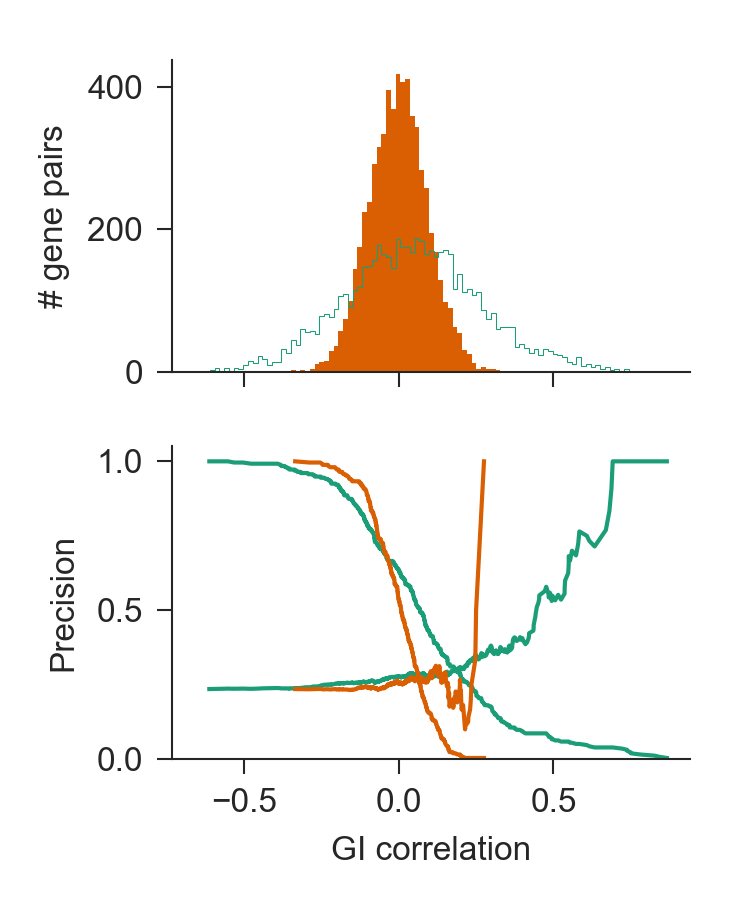

In [37]:
fig, axes = plt.subplots(2,1, figsize=(2.5,3), sharex=True)

axis = axes[0]
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

binrange = np.linspace(min(upperTriangle(emap_gene_corr)), max(upperTriangle(emap_gene_corr)), 100)

axis.hist(upperTriangle(emap_gene_random_corr), bins=binrange, histtype='stepfilled', color=dark2_all[1])
axis.hist(upperTriangle(emap_gene_corr), bins=binrange, histtype='step', color=dark2_all[0])

axis.set_ylabel('# gene pairs', fontsize=8)

axis = axes[1]
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

corrPR = calcPR(upperTriangle(emap_gene_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

axis.plot(zip(*corrPR)[2], zip(*corrPR)[1], lw=1, c=dark2_all[0])
axis.plot(zip(*corrPR)[2], zip(*corrPR)[0], lw=1, c=dark2_all[0])

corrPR = calcPR(upperTriangle(emap_gene_random_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene_random.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

axis.plot(zip(*corrPR)[2], zip(*corrPR)[1], lw=1, c=dark2_all[1])
axis.plot(zip(*corrPR)[2], zip(*corrPR)[0], lw=1, c=dark2_all[1])

axis.set_xlabel('GI correlation', fontsize=8)

axis.set_ylim((0,1.05))
axis.set_ylabel('Precision', fontsize=8)

plt.tight_layout()
Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/', 'precision_recall'))

In [161]:
#permuting gene names
gene_names_rand = np.random.permutation(emap_gene.index.values)
emap_gene_random = emap_gene.copy()
emap_gene_random.index = gene_names_rand
emap_gene_random.columns = gene_names_rand
emap_gene_random_corr = calculateCorrelationMatrix(emap_gene_random)

(0.03937007874015748, 1.0, 0.6917874541067532)
(0.003937007874015748, 1.0, 12.588007595083694)
(0, 1, nan)
(0.013513513513513514, 1.0, -10.677762081464182)
(0, 1, nan)
(0, 1, nan)
(0.019230769230769232, 1.0, 9.537746863255883)
(0, 1, nan)
Doubles_Libraries/figs_crispra/png/663fig_precision_recall.png


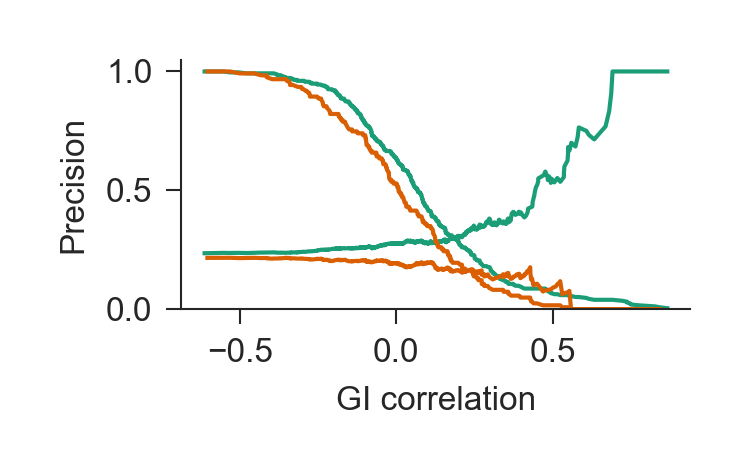

In [162]:
fig, axis = plt.subplots(1,1, figsize=(2.5,1.5))

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

corrPR = calcPR(upperTriangle(emap_gene_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene,k=1).loc[upperTriangle(emap_gene,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

axis.plot(zip(*corrPR)[2], zip(*corrPR)[1], lw=1, c=dark2_all[0])
axis.plot(zip(*corrPR)[2], zip(*corrPR)[0], lw=1, c=dark2_all[0])

corrPR = calcPR(upperTriangle(emap_gene_random_corr,k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
absGIPR = calcPR(upperTriangle(emap_gene_random.abs(),k=1), 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
buffGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) > 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=False)[0]
synGIPR = calcPR(upperTriangle(emap_gene_random,k=1).loc[upperTriangle(emap_gene_random,k=1) < 0], 
                set(truepositives.loc[truepositives].index), 
                set(truenegatives.loc[truenegatives].index), ascending=True)[0]

axis.plot(zip(*corrPR)[2], zip(*corrPR)[1], lw=1, c=dark2_all[1])
axis.plot(zip(*corrPR)[2], zip(*corrPR)[0], lw=1, c=dark2_all[1])

axis.set_xlabel('GI correlation', fontsize=8)

axis.set_ylim((0,1.05))
axis.set_ylabel('Precision', fontsize=8)

plt.tight_layout()
Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/', 'precision_recall'))

In [168]:
#for averaging randomized maps
def calcPR_allpositions(scoreList, truePos, trueNeg, ascending=True, print_cross=True):
    truePos = truePos.intersection(scoreList.index)
    trueNeg = trueNeg.intersection(scoreList.index)
    
    cumulativeTup = [(0,1,np.nan)]
    cumulativeTP = 0.0
    cumulativeFP = 0.0
    
    tup_cross95 = None
    
    for gene, score in scoreList.sort_values(inplace=False, ascending=ascending).iteritems():
        if gene in truePos or gene in trueNeg:
            if gene in truePos:
                cumulativeTP += 1

            elif gene in trueNeg:
                cumulativeFP += 1

        cumulativeTup.append(((cumulativeTP / len(truePos)) if len(truePos)>0 else 0, (cumulativeTP / (cumulativeTP + cumulativeFP)) if (cumulativeTP + cumulativeFP) > 0 else 1, score))

                
    return cumulativeTup

In [169]:
rand_precisions = []
rand_recalls = []
for i in range(100):
    gene_names_rand = np.random.permutation(emap_gene.index.values)
    emap_gene_random = emap_gene.copy()
    emap_gene_random.index = gene_names_rand
    emap_gene_random.columns = gene_names_rand
    emap_gene_random_corr = calculateCorrelationMatrix(emap_gene_random)

    corrPR = calcPR_allpositions(upperTriangle(emap_gene_random_corr,k=1), 
                    set(truepositives.loc[truepositives].index), 
                    set(truenegatives.loc[truenegatives].index), ascending=False)[0]
    
    rand_precisions.append(zip(*corrPR)[1])
    rand_recalls.append(zip(*corrPR)[0])

TypeError: zip argument #1 must support iteration

In [170]:
corrPR

(0, 1, nan)

In [46]:
1-hierarchy.linkage(emap_gene, method='average', metric='correlation', optimal_ordering=True)[:,2] < 0.2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [47]:
1-dend_combined[:,2] < 0.2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [131]:
def get_random_gimap(input_map):
    input_map_col = upperTriangle(input_map, k=0)
    random_map = pd.DataFrame(input_map_col.iloc[np.random.randint(0, high=len(input_map_col), size=(len(input_map)**2, ))].values.reshape((len(input_map),len(input_map))))
    random_map.index = input_map.index
    random_map.columns = input_map.columns
    
    return (random_map * np.triu(np.ones((len(input_map), len(input_map))), k=0)) \
        + (random_map * np.triu(np.ones((len(input_map), len(input_map))), k=1)).T

In [132]:
%%timeit
get_random_gimap(emap_gene)

100 loops, best of 3: 8.2 ms per loop


In [76]:
def test_rand_col(input_map):
    input_map_col = upperTriangle(input_map, k=0)
    
    return input_map_col.iloc[np.random.randint(0, high=len(input_map_col), size=(len(input_map), ))]

In [77]:
%%timeit
test_rand_col(emap_gene)

1000 loops, best of 3: 1.6 ms per loop


In [133]:
get_random_gimap(emap_gene).iloc[:5,:5]

AHR    ARID1A    ARRDC3      ATL1      BAK1
AHR     1.959466  0.502121 -2.114276 -0.700466  2.612702
ARID1A  0.502121  2.153339 -1.324704  1.374422  1.418127
ARRDC3 -2.114276 -1.324704 -0.016183 -1.435441  1.252698
ATL1   -0.700466  1.374422 -1.435441 -2.493781  2.009735
BAK1    2.612702  1.418127  1.252698  2.009735  1.845773

In [136]:
num_clusters = []

for i in range(1000):
    num_clusters.append(sum(1-hierarchy.linkage(get_random_gimap(emap_gene), method='average', metric='correlation', optimal_ordering=True)[:,2] < 0.2) + 1)
    

Doubles_Libraries/figs_crispra/png/660fig_rand_maps.png


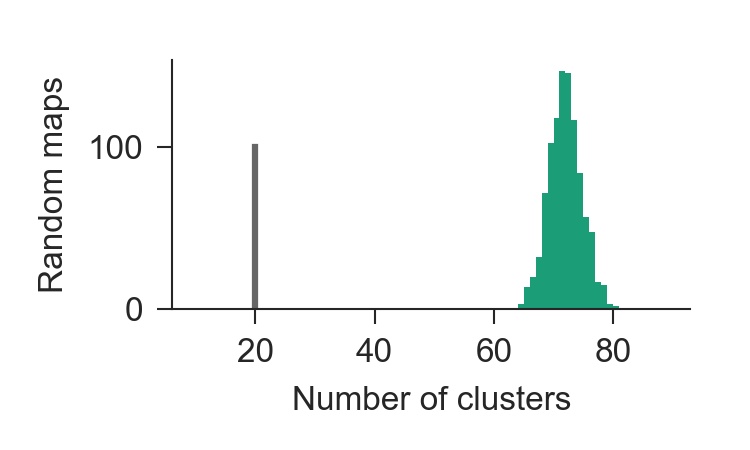

In [141]:
fig, axis = plt.subplots(figsize=(2.5,1.5))
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.yaxis.set_tick_params(left='on', right='off', labelsize='8')
axis.xaxis.set_tick_params(which = 'both', bottom='on', top='off', labelsize='8')

axis.hist(num_clusters, bins=np.arange(10,90,1))

num_clusters_nonrandom = sum(1-hierarchy.linkage(emap_gene, method='average', metric='correlation', optimal_ordering=True)[:,2] < 0.2)
axis.plot((num_clusters_nonrandom,num_clusters_nonrandom), (0,100), '-', c='#666666')

axis.set_xlabel('Number of clusters', fontsize=8)
axis.set_ylabel('Random maps', fontsize=8)

plt.tight_layout()

Image(saveFigures(fig,'Doubles_Libraries/figs_crispra/', 'rand_maps'))

In [53]:
sum(1-hierarchy.linkage(emap_gene, method='average', metric='correlation', optimal_ordering=True)[:,2] < 0.2)

20

In [142]:
upperTriangle(get_random_gimap(emap_gene)).describe()

count    6216.000000
mean        0.121718
std         2.224637
min       -17.373677
25%        -0.957125
50%         0.141027
75%         1.279775
max        12.444251
dtype: float64

In [110]:
upperTriangle(emap_gene).describe()

count    6216.000000
mean        0.050820
std         2.184771
min       -17.987431
25%        -1.005727
50%         0.101260
75%         1.247681
max        11.558372
dtype: float64

In [126]:
def reverse_upperTriangle(input_col, matrix_dimension):
    vector_list = []
    
    list_start = 0
    list_end = matrix_dimension
    while list_end != 0:
        print list_start, list_end, np.zeros((matrix_dimension - list_end, )), input_col[list_start:list_start+list_end]
        if list_end < matrix_dimension:
            vector_list.append(np.vstack([np.zeros((matrix_dimension - list_end, )).T, input_col[list_start:list_start+list_end]]))
        else: 
            vector_list.append(input_col[list_start:list_start+list_end])
        list_start = list_start+list_end
        list_end -= 1
        
    return np.hstack(vector_list)

In [128]:
np.triu_indices(112)

(array([  0,   0,   0, ..., 110, 110, 111]),
 array([  0,   1,   2, ..., 110, 111, 111]))

In [130]:
_128[0].shape

(6328,)

In [143]:
spearmans = []
threshs = np.hstack((10**np.arange(-5,0,.5), np.arange(1,15,.25)))
for thresh in threshs:
    emap_gene_compressed = emap_gene.applymap(lambda val: thresh if val > thresh else (-1*thresh if val < -1*thresh else val))
    
    spearmans.append(stats.spearmanr(upperTriangle(calculateCorrelationMatrix(emap_gene_compressed)),
               upperTriangle(emap_gene_corr))[0])

Doubles_Libraries/figs_part2/png/002760fig_dynamic_range.png


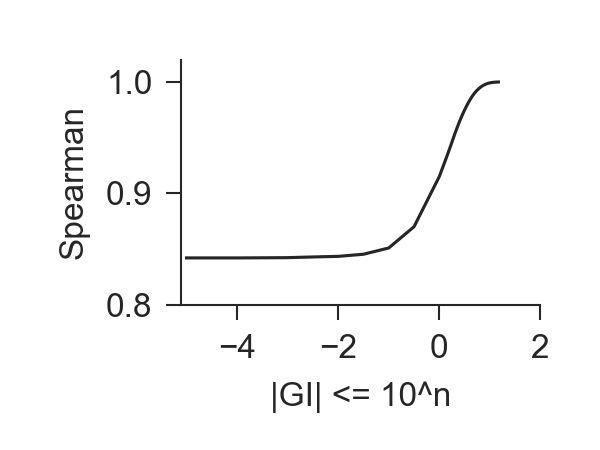

In [146]:
fig, axis = plt.subplots(figsize=(2,1.5))

axis.xaxis.tick_bottom()
axis.yaxis.tick_left()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)


axis.plot(np.log10(threshs), spearmans, lw=.75, color=almost_black)

axis.set_xlabel('|GI| <= 10^n', fontsize=8)
axis.set_ylabel('Spearman', fontsize=8)

axis.set_ylim((0.8,1.02))
axis.set_xlim((-5.1,2))
axis.set_xticks((-4, -2, 0, 2))

axis.xaxis.set_tick_params(labelsize=8)
axis.yaxis.set_tick_params(labelsize=8)

# plt.legend(loc='upper left',fontsize=8)

plt.tight_layout()
Image(saveFigures(fig,'Doubles_Libraries/figs_part2/','dynamic_range'))